# Animal Agriculture Analysis

## Data extraction

In [40]:
from owid.catalog import charts
import pandas as pd
import numpy as np
import pandas as pd
import requests
import matplotlib


ModuleNotFoundError: No module named 'matplotlib'

In [13]:
# URL paths to relevant charts
milks_path = 'https://ourworldindata.org/grapher/environmental-footprint-milks'
feed_per_kg_path = 'https://ourworldindata.org/grapher/feed-required-to-produce-one-kilogram-of-meat-or-dairy-product'
total_slaughter_path = 'https://ourworldindata.org/grapher/animals-slaughtered-for-meat'
protein_efficiency_path = 'https://ourworldindata.org/grapher/protein-efficiency-of-meat-and-dairy-production'
meat_production_path = 'https://ourworldindata.org/grapher/global-meat-production-by-livestock-type'


In [14]:
# get the data for each chart by URL
milks_df = charts.get_data(milks_path)
feed_per_kg_df = charts.get_data(feed_per_kg_path)
total_slaughter_df = charts.get_data(total_slaughter_path)
protein_efficiency_df = charts.get_data(protein_efficiency_path)
meat_production_df = charts.get_data(meat_production_path)


In [26]:
meat_production_df.columns

Index(['entities', 'years', 'meat__game__00001163__production__005510__tonnes',
       'meat__horse__00001097__production__005510__tonnes',
       'meat__camel__00001127__production__005510__tonnes',
       'meat__sheep_and_goat__00001807__production__005510__tonnes',
       'meat__beef_and_buffalo__00001806__production__005510__tonnes',
       'meat__pig__00001035__production__005510__tonnes',
       'meat__poultry__00001808__production__005510__tonnes'],
      dtype='object')

## Data transformation

In [32]:
# Standardize column names

# Standardize milks columns
milks_renaming = {
    '_242004': 'land_use_m2',
    '_242005': 'ghg_co2eq_kg',
    '_242006': 'water_use_L',
    '_242007': 'eutrophication_PO4eq_g'
    }

# Standardize total slaughter columns
total_slaughter_renaming = {
    'meat_of_cattle_with_the_bone__fresh_or_chilled__00000867__producing_or_slaughtered_animals__005320__animals': 'cattle',
    'meat__goat__00001017__producing_or_slaughtered_animals__005320__animals': 'goat',
    'meat__chicken__00001058__producing_or_slaughtered_animals__005321__animals': 'chicken',
    'meat__turkey__00001080__producing_or_slaughtered_animals__005321__animals': 'turkey',
    'meat__pig__00001035__producing_or_slaughtered_animals__005320__animals': 'pig',
    'meat__lamb_and_mutton__00000977__producing_or_slaughtered_animals__005320__animals': 'sheep',
    'meat__duck__00001069__producing_or_slaughtered_animals__005321__animals': 'duck'
    }

# Standardize meat production columns
meat_production_renaming = {
    'meat__horse__00001097__production__005510__tonnes': 'horse_tonnes',
    'meat__camel__00001127__production__005510__tonnes': 'camel_tonnes',
    'meat__sheep_and_goat__00001807__production__005510__tonnes': 'sheep_and_goat_tonnes',
    'meat__beef_and_buffalo__00001806__production__005510__tonnes': 'beef_and_buffalo_tonnes',
    'meat__pig__00001035__production__005510__tonnes': 'pig_tonnes',
    'meat__poultry__00001808__production__005510__tonnes': 'poultry_tonnes'
    }


In [33]:
milks_df = milks_df.rename(columns=milks_renaming)
total_slaughter_df = total_slaughter_df.rename(columns=total_slaughter_renaming)
meat_production_df = meat_production_df.rename(columns=meat_production_renaming)


In [42]:
world_total_slaughter_df = total_slaughter_df.loc[total_slaughter_df['entities'] == 'World'].copy()
mexico_total_slaughter_df = total_slaughter_df.loc[total_slaughter_df['entities'] == 'Mexico'].copy()

<Axes: xlabel='years'>

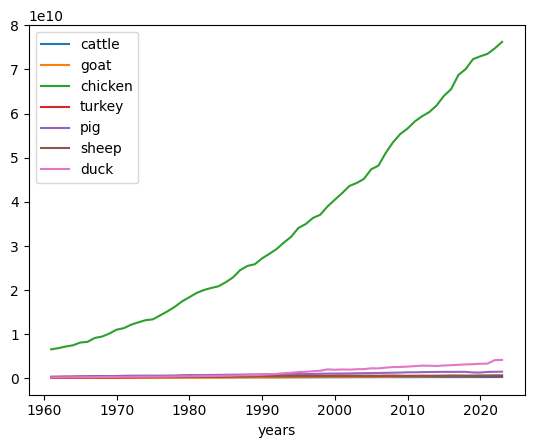

In [50]:
world_total_slaughter_df.plot.line(x='years')